Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import glob
import pickle 
import cv2
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from pathlib import Path
import seaborn as sb
sb.set()
from tensorflow.keras import layers

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [10]:
datadir=Path("./DeepLearningAssignment/flowers/flowers")



In [11]:
flowers = []
features = []
labels = []
for dir in datadir.iterdir():
    flowers.append(dir.name)
    print(dir.name)
    for img_path in dir.iterdir():
        if img_path.name.endswith("jpg"):
            labels.append(dir.name)
            img_arr = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (150,150))
            features.append(img_arr)

dandelion
sunflower
daisy
tulip
rose


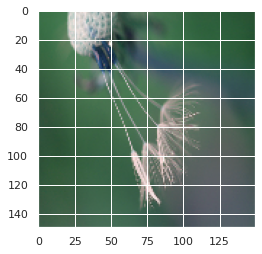

In [12]:
plt.imshow(features[100])
plt.show()



In [13]:
features = np.array(features)
labels = np.array(labels)
np.savez_compressed("flower_data", features, labels)

In [14]:
def prep(features, labels):
    features=features.reshape(len(features), 150,150,3)/255.0
    one_hot=LabelBinarizer()
    labels=one_hot.fit_transform(labels)
    return features, labels, one_hot

In [15]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
x,y,one_hot=prep(features, labels)
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=42, shuffle=True)

In [17]:
training_model = model.fit(x_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
21/21 [==============================] - 129s 6s/step - loss: 1.6598 - accuracy: 0.2384
Epoch 2/50
21/21 [==============================] - 126s 6s/step - loss: 1.2765 - accuracy: 0.4444
Epoch 3/50
21/21 [==============================] - 125s 6s/step - loss: 1.0353 - accuracy: 0.5781
Epoch 4/50
21/21 [==============================] - 125s 6s/step - loss: 0.9974 - accuracy: 0.6124
Epoch 5/50
21/21 [==============================] - 126s 6s/step - loss: 0.9395 - accuracy: 0.6169
Epoch 6/50
21/21 [==============================] - 126s 6s/step - loss: 0.8703 - accuracy: 0.6549
Epoch 7/50
21/21 [==============================] - 127s 6s/step - loss: 0.7842 - accuracy: 0.6957
Epoch 8/50
21/21 [==============================] - 126s 6s/step - loss: 0.7526 - accuracy: 0.7055
Epoch 9/50
21/21 [==============================] - 125s 6s/step - loss: 0.7279 - accuracy: 0.7192
Epoch 10/50
21/21 [==============================] - 125s 6s/step - loss: 0.6102 - accuracy: 0.7691
Epoch 11/

In [18]:
model.save("flowermodel.h5")

In [19]:
def plot_accuracy(training_model):
    plt.figure(figsize=(10,5))
    plt.plot(training_model.history["accuracy"], label="Accuracy", color = "b")
    plt.plot(training_model.history["loss"], label = "Loss", color = "r")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

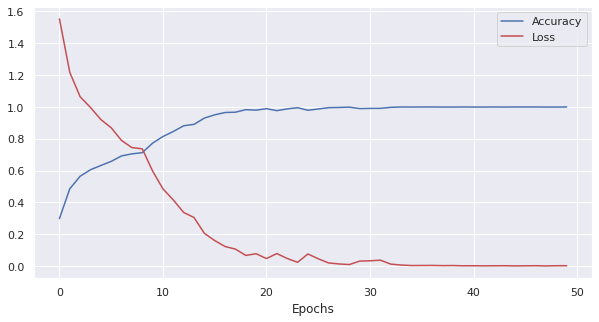

In [20]:
plot_accuracy(training_model)

In [21]:
model=tf.keras.models.load_model("flowermodel.h5")

In [23]:
model.evaluate(x_test,y_test)

55/55 [==============================] - 25s 449ms/step - loss: 2.7220 - accuracy: 0.6815


[2.722031831741333, 0.6815028786659241]

In [24]:
model.predict(x_test).sum()

1730.0